<a href="https://colab.research.google.com/github/anorlo/Pytorch/blob/master/Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The first CIFAR10 code

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)
ds = []
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



Superclasses = ('aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables',
                'household electrical devices', 'household furniture', 'insects', 'large carnivores'
                'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores'
                'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals'
                'trees', 'vehicles 1', 'vehicles 2')

classes = ('apples', 'aquarium fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottles', 'bowls', 'boy', 
     'bridge', 'bus', 'butterfly', 'camel', 'cans', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
     'cloud', 'cockroach', 'computer keyboard', 'couch', 'crab', 'crocodile', 'cups', 'dinosaur', 'dolphin', 'elephant', 
     'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'lamp', 'lawn-mower', 'leopard', 'lion', 'lizard', 
     'lobster', 'man', 'maple', 'motorcycle', 'mountain', 'mouse', 'mushrooms', 'oak', 'oranges', 'orchids', 'otter', 'palm', 
     'pears', 'pickup truck', 'pine', 'plain', 'plates', 'poppies', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 
     'rocket', 'roses', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 
     'sunflowers', 'sweet peppers', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulips', 
     'turtle', 'wardrobe', 'whale', 'willow', 'wolf', 'woman', 'worm')
 



Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


 cans plates beetle pickup truck


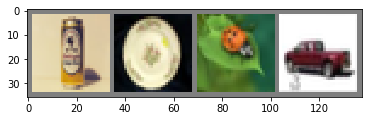

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# def unpickle(file):
#     import pickle
#     with open(file, 'rb') as fo:
#         dict = pickle.load(fo, encoding='bytes')
#     return dict
# tr = unpickle('/content/data/cifar-100-python/train')
# for i in tr:
#   print(i)
# for i in range(49999):
#   # print(i, tr[b'fine_labels'][i])
#   if(tr[b'fine_labels'][i] == 1):
#     print(tr[b'filenames'][i])
#     print(tr[b'coarse_labels'][i])

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
# print(labels)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
# a = ['apples', 'aquarium fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottles', 'bowls', 'boy', 
#      'bridge', 'bus', 'butterfly', 'camel', 'cans', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
#      'cloud', 'cockroach', 'computer keyboard', 'couch', 'crab', 'crocodile', 'cups', 'dinosaur', 'dolphin', 'elephant', 
#      'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'lamp', 'lawn-mower', 'leopard', 'lion', 'lizard', 
#      'lobster', 'man', 'maple', 'motorcycle', 'mountain', 'mouse', 'mushrooms', 'oak', 'oranges', 'orchids', 'otter', 'palm', 
#      'pears', 'pickup truck', 'pine', 'plain', 'plates', 'poppies', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 
#      'rocket', 'roses', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 
#      'sunflowers', 'sweet peppers', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulips', 
#      'turtle', 'wardrobe', 'whale', 'willow', 'wolf', 'woman', 'worm']

# '''
# 将每个单词用单引号包住
# a = "beaver, dolphin, otter, seal, whale, aquarium fish, flatfish, ray, shark, trout, orchids, poppies, roses, sunflowers, tulips, \
#   bottles, bowls, cans, cups, plates, apples, mushrooms, oranges, pears, sweet peppers, 	clock, computer keyboard, lamp, telephone, television, \
#   bed, chair, couch, table, wardrobe, bee, beetle, butterfly, caterpillar, cockroach, bear, leopard, lion, tiger, wolf, bridge, castle, house, road, \
#   skyscraper, cloud, forest, mountain, plain, sea, camel, cattle, chimpanzee, elephant, kangaroo, fox, porcupine, possum, raccoon, skunk, crab, lobster, \
#   snail, spider, worm, baby, boy, girl, man, woman, crocodile, dinosaur, lizard, snake, turtle, hamster, mouse, rabbit, shrew, squirrel, maple, oak, \
#   palm, pine, willow, bicycle, bus, motorcycle, pickup truck, train, lawn-mower, rocket, streetcar, tank, tractor"

# find_all = lambda a, s: [r for r in range(len(a)) if a[r] == s]
# A = list(a)
# b = find_all(a, ',')
# print(b)
# for i in range(99):
#   A.insert(b[i]+i, '\'')
#   a = "".join(A)
# print(a)
# A = list(a)
# b = find_all(a, ',')
# for i in range(99):
#   A.insert(b[i]+i+2, '\'')
#   a = "".join(A)
# print(a)
# '''


# 排序
# a = ['beaver', 'dolphin', 'otter', 'seal', 'whale', 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout', 'orchids', 'poppies', 'roses', 
#      'sunflowers', 'tulips', 'bottles', 'bowls', 'cans', 'cups', 'plates', 'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', 
#      'clock', 'computer keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair', 'couch', 'table', 'wardrobe', 'bee', 'beetle', 'butterfly', 
#      'caterpillar', 'cockroach', 'bear', 'leopard', 'lion', 'tiger', 'wolf', 'bridge', 'castle', 'house', 'road', 'skyscraper', 'cloud', 'forest', 
#      'mountain', 'plain', 'sea', 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', 'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 'crab', 
#      'lobster', 'snail', 'spider', 'worm', 'baby', 'boy', 'girl', 'man', 'woman', 'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', 'hamster', 
#      'mouse', 'rabbit', 'shrew', 'squirrel', 'maple', 'oak', 'palm', 'pine', 'willow', 'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', 
#      'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']
# b = sorted(a)
# print(b)

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.conv1 = nn.Conv2d(3, 16, 5, padding = 2)
      self.pool = nn.MaxPool2d(2, 2)
      self.conv2 = nn.Conv2d(16, 200, 5, padding = 2)
      self.conv3 = nn.Conv2d(200, 200, 5, padding = 2)
      self.fc1 = nn.Linear(200 * 4 * 4, 1200)
      self.fc2 = nn.Linear(1200, 840)
      self.fc3 = nn.Linear(840, 100)

    def forward(self, x):
      x = self.pool(F.relu(self.conv1(x)))
      x = self.pool(F.relu(self.conv2(x)))
      x = self.pool(F.relu(self.conv3(x)))
      x = x.view(-1, 200 * 4 * 4)
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.fc3(x)
      return x

net = Net()
net = net.to(device)

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
for epoch in range(10):
  
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # print(labels)
        optimizer.zero_grad()
        outputs = net(inputs)
        # print(outputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 ==1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 4.601
[1,  4000] loss: 4.385
[1,  6000] loss: 4.102
[1,  8000] loss: 3.913
[1, 10000] loss: 3.775
[1, 12000] loss: 3.678
[2,  2000] loss: 3.472
[2,  4000] loss: 3.370
[2,  6000] loss: 3.286
[2,  8000] loss: 3.202
[2, 10000] loss: 3.089
[2, 12000] loss: 3.065
[3,  2000] loss: 2.806
[3,  4000] loss: 2.773
[3,  6000] loss: 2.741
[3,  8000] loss: 2.691
[3, 10000] loss: 2.657
[3, 12000] loss: 2.614
[4,  2000] loss: 2.302
[4,  4000] loss: 2.277
[4,  6000] loss: 2.269
[4,  8000] loss: 2.290
[4, 10000] loss: 2.237
[4, 12000] loss: 2.257
[5,  2000] loss: 1.790
[5,  4000] loss: 1.875
[5,  6000] loss: 1.866
[5,  8000] loss: 1.883
[5, 10000] loss: 1.897
[5, 12000] loss: 1.892
[6,  2000] loss: 1.318
[6,  4000] loss: 1.425
[6,  6000] loss: 1.450
[6,  8000] loss: 1.492
[6, 10000] loss: 1.535
[6, 12000] loss: 1.527
[7,  2000] loss: 0.902
[7,  4000] loss: 0.979
[7,  6000] loss: 1.046
[7,  8000] loss: 1.110
[7, 10000] loss: 1.166
[7, 12000] loss: 1.198
[8,  2000] loss: 0.584
[8,  4000] 

GroundTruth:  camel chimpanzee  tank bridge


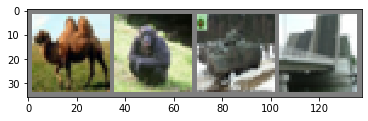

In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
images, labels = images.to(device), labels.to(device)

# outputs = outputs.to(device)
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:  cattle chimpanzee  bear bridge


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 40 %


In [0]:
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(100):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of apples : 34 %
Accuracy of aquarium fish : 42 %
Accuracy of  baby : 29 %
Accuracy of  bear : 22 %
Accuracy of beaver : 13 %
Accuracy of   bed : 28 %
Accuracy of   bee : 47 %
Accuracy of beetle : 55 %
Accuracy of bicycle : 52 %
Accuracy of bottles : 49 %
Accuracy of bowls : 10 %
Accuracy of   boy : 30 %
Accuracy of bridge : 48 %
Accuracy of   bus : 44 %
Accuracy of butterfly : 30 %
Accuracy of camel : 30 %
Accuracy of  cans : 51 %
Accuracy of castle : 44 %
Accuracy of caterpillar : 34 %
Accuracy of cattle : 33 %
Accuracy of chair : 79 %
Accuracy of chimpanzee : 70 %
Accuracy of clock : 35 %
Accuracy of cloud : 46 %
Accuracy of cockroach : 70 %
Accuracy of computer keyboard : 34 %
Accuracy of couch : 39 %
Accuracy of  crab : 28 %
Accuracy of crocodile : 61 %
Accuracy of  cups : 41 %
Accuracy of dinosaur : 33 %
Accuracy of dolphin : 40 %
Accuracy of elephant : 42 %
Accuracy of flatfish : 37 %
Accuracy of forest : 50 %
Accuracy of   fox : 21 %
Accuracy of  girl : 46 %
Accuracy o